In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [12]:
dataset_path = "C:\\Users\\Mohit\\Downloads\\Pesteringdata\\Dataset"

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

In [13]:
# Rescale pixel values to [0, 1] range
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)

# Load data using flow_from_directory
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial blight_cassava': 1, 'brown spot_cassava': 2, 'fall armyworm_maize': 3, 'grasshoper_maize': 4, 'green mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf beetle_maize': 11, 'leaf blight_maize': 12, 'leaf blight_tomato': 13, 'leaf curl_tomato': 14, 'leaf miner_cashew': 15, 'leaf spot_maize': 16, 'mosaic_cassava': 17, 'red rust_cashew': 18, 'septoria leaf spot_tomato': 19, 'streak virus_maize': 20, 'verticulium wilt_tomato': 21}


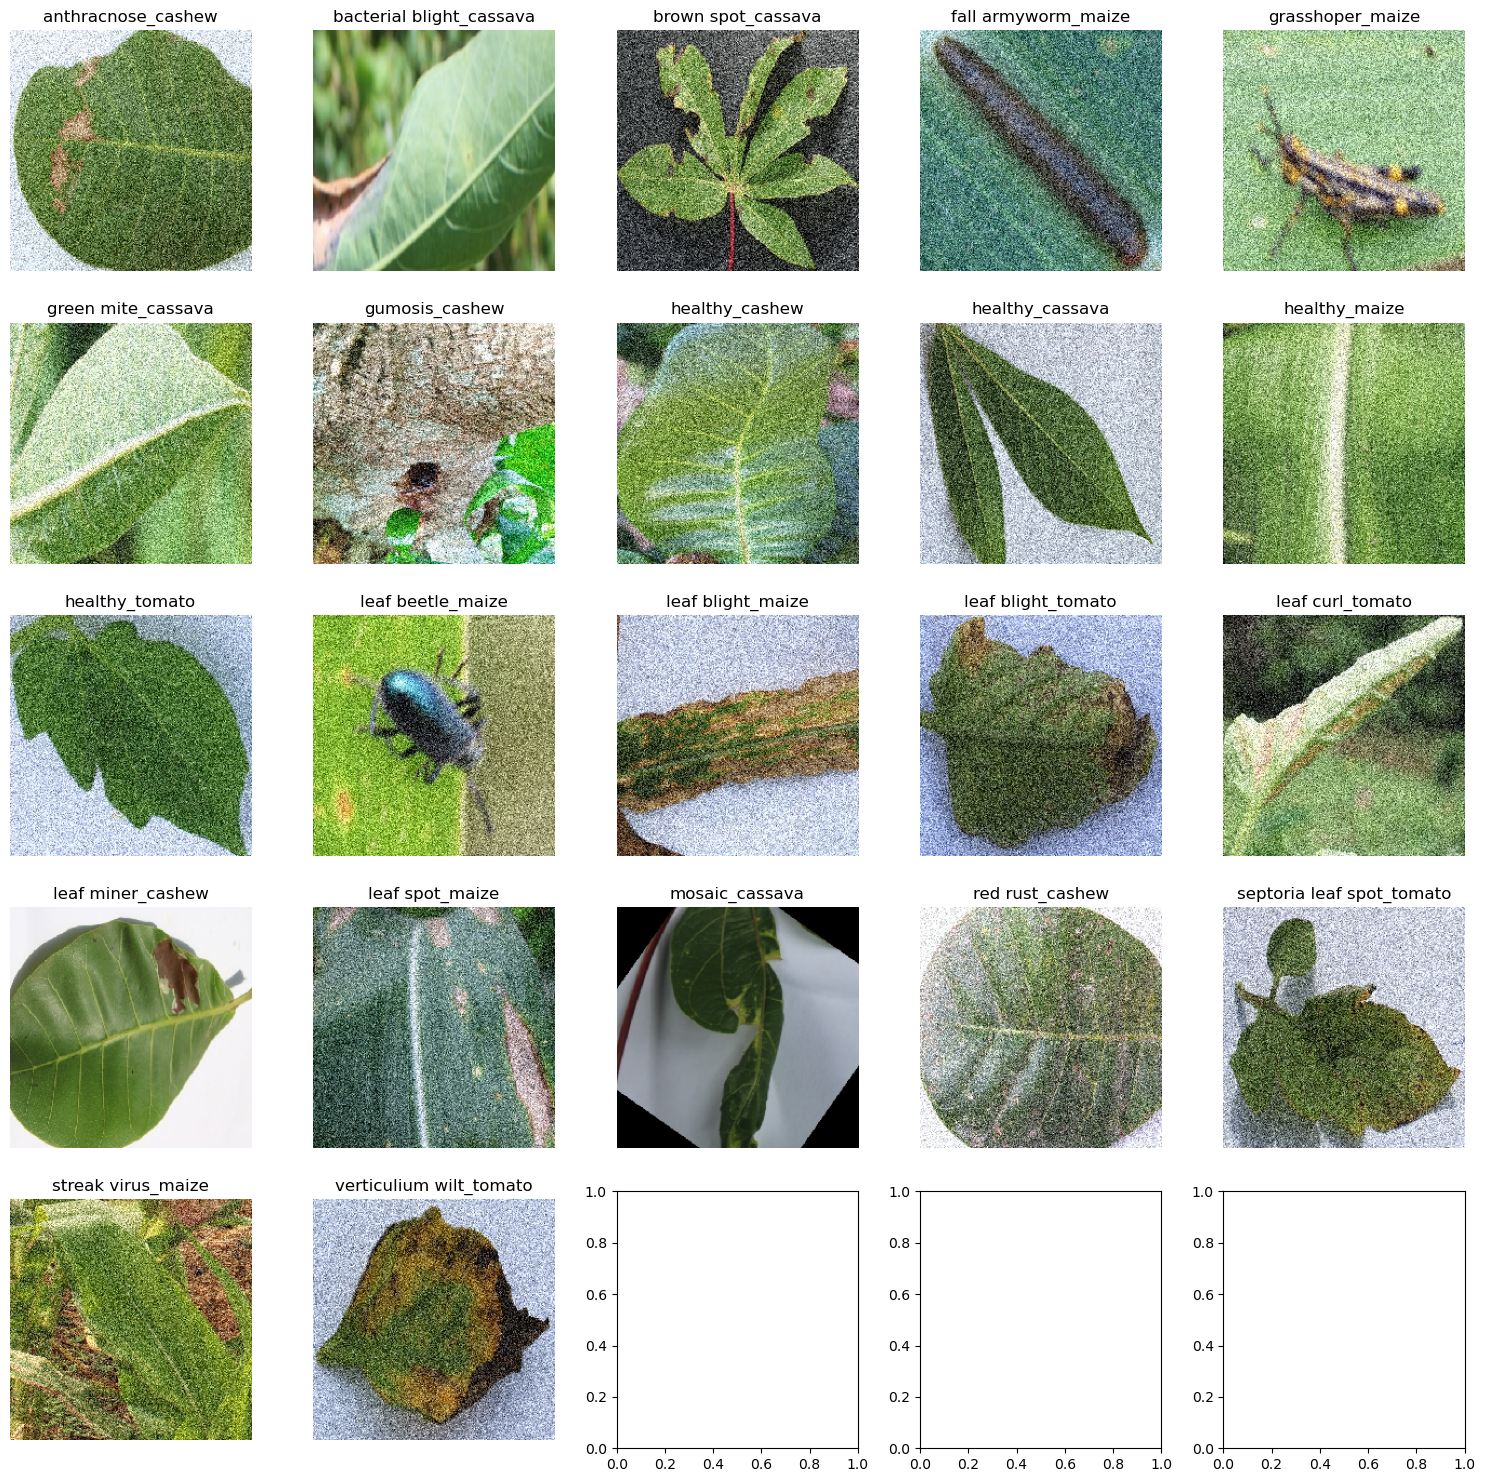

In [14]:
#Required code to print images of each class
class_labels = list(train_generator.class_indices.keys())  
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i, class_name in enumerate(class_labels):
    # Get a batch of images and labels
    class_path = os.path.join(train_dir, class_name)
    img_path = os.path.join(class_path, os.listdir(class_path)[0])  
    
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img) / 255.0  

    # Plot the image
    axes[i].imshow(img_array)
    axes[i].axis('off')
    axes[i].set_title(class_name)

plt.tight_layout()
plt.show()